<a href="https://colab.research.google.com/github/xuzhenting/Notebooks/blob/main/Python_%E5%A4%A7%E6%95%B8%E6%93%9A%E6%94%B6%E9%9B%86%E5%88%86%E6%9E%90%E8%88%87%E8%A6%96%E8%A6%BA%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 一、Pandas基礎入門

## 宣告資料

Pandas常用的資料類型有：
1. Series：一維陣列的資料，列(index)為資料儲存順序
2. DataFrame：二維的資料陣列，由列(index)及欄(column)組合而成

Pandas模組匯入

```
import pandas as pd
```

### Series 一維資料

```
se = pd.Series(串列)
```

In [ ]:
!pip install pandas

In [2]:
# 宣告
import pandas as pd

# 一維資料 Series
price = [100, 50, 120, 80, 30]
se = pd.Series(price)

# 求值
se.values

# 求索引
se.index

# 自訂index
fruits = ['Apple', 'Banana', 'Cherry', 'Orange', 'Tomato']
price = [100, 50, 120, 80, 30]
se2 = pd.Series(price, index=fruits)
se2

Apple     100
Banana     50
Cherry    120
Orange     80
Tomato     30
dtype: int64

In [ ]:
# 取得數值資料的統計資訊
se2.describe()

#count技術, mean平均, std標準差, min最小值, max最大值  

count      5.000000
mean      76.000000
std       36.469165
min       30.000000
25%       50.000000
50%       80.000000
75%      100.000000
max      120.000000
dtype: float64

In [ ]:
# 統計：加總、最小值、最大值、平均值、中位數
se2.sum()
se2.min()
se2.max()
se2.mean()
se2.median()

80.0

In [5]:
# 取值
se2

Apple     100
Banana     50
Cherry    120
Orange     80
Tomato     30
dtype: int64

In [9]:
# 用索引值
se2[2]
# loc用索引名稱取值, iloc用索引數字去取值[0,1,2,3]
se2.loc['Orange']
se2.iloc[3]

80

### DataFrame 二維資料

```
df = pd.DataFrame(字典)
```

範例資料:

```
{
  "姓名":["林小明", "陳聰明", "黃美麗", "張小娟", "廖小誠"],
  "國文":[65,92,78,83,70],
  "英文":[90,72,76,93,56],
  "數學":[81,85,91,89,77],
  "社會":[79,53,47,94,80] 
}
```

In [12]:
# 定義 DataFrame 資料
import pandas as pd
df = pd.DataFrame({
  "姓名":["林小明", "陳聰明", "黃美麗", "張小娟", "廖小誠"],
  "國文":[65,92,78,83,70],
  "英文":[90,72,76,93,56],
  "數學":[81,85,91,89,77],
  "社會":[79,53,47,94,80] 
})

In [20]:
df

,姓名,國文,英文,數學,社會
0,林小明,65,90,81,79
1,陳聰明,92,72,85,53
2,黃美麗,78,76,91,47
3,張小娟,83,93,89,94
4,廖小誠,70,56,77,80


In [19]:
# 顯示 index, columns
df.index
df.columns #查看欄名

# 取得所有值
df.values

array([['林小明', 65, 90, 81, 79],
       ['陳聰明', 92, 72, 85, 53],
       ['黃美麗', 78, 76, 91, 47],
       ['張小娟', 83, 93, 89, 94],
       ['廖小誠', 70, 56, 77, 80]], dtype=object)

In [36]:
# 取得列資料 索引, loc, iloc
df.values[4]
df.loc[1]
df.iloc[1]

# 取得欄資料(單欄、多欄)
df['姓名']
df['國文']
df[['姓名', '國文']]
df[['國文', '英文', '數學']]

# 取得指定欄列(儲存格)的值 索引, loc, iloc
df.values[0, 1] #[列,欄]
df.loc[1, '英文']
df.loc[3, '數學']
df.iloc[3, 3]

89

In [54]:
# 取得最前或最後幾筆資料
# .head(n) .tail(n) n 預設為5
df.head(2)
df.tail(2)

# 篩選
condition = (df['姓名'] == "陳聰明")
condition = (df['英文'] > 80)
# and --> & , or --> |
condition = (df['英文'] > 80) & (df['國文'] > 80)
condition = (df['英文'] > 80) | (df['國文'] > 80)
df[condition]

# 排序 
# df.sort_values([欄名] [,ascending=布林值]) 預設排序為True順向排序
df.sort_values(['國文'], ascending=False)
df.sort_values(['國文', '英文'], ascending=[False, True])

,姓名,國文,英文,數學,社會
1,陳聰明,92,72,85,53
3,張小娟,83,93,89,94
2,黃美麗,78,76,91,47
4,廖小誠,70,56,77,80
0,林小明,65,90,81,79


In [56]:
# 指定欄位索引
df1 = df.set_index('姓名')
df1

,國文,英文,數學,社會
姓名,,,,
林小明,65,90,81,79
陳聰明,92,72,85,53
黃美麗,78,76,91,47
張小娟,83,93,89,94
廖小誠,70,56,77,80


In [57]:
df1.loc['黃美麗', '數學']
df1.iloc[2, 2]

91

## 讀取資料

Pandas可以讀取本地或是網路上「表格式」的資料，如CSV、Excel、json、html，方法有：
1. read_csv() 
2. read_excel()
3. read_json()
4. read_html()

In [59]:
# 讀取遠端資料
# COVID-19各國家地區累積病例數與死亡數
# https://data.gov.tw/dataset/120449
# https://od.cdc.gov.tw/eic/covid19/covid19_global_cases_and_deaths.csv

import pandas as pd
url = 'https://od.cdc.gov.tw/eic/covid19/covid19_global_cases_and_deaths.csv'
df = pd.read_csv(url, thousands=',') # thousands 去除千位符號
df.head()

,country_ch,country_en,cases,deaths
0,美國,United States,91109091,1052741
1,印度,India,44067144,526477
2,法國,France,33960131,152370
3,巴西,Brazil,33924061,679275
4,德國,Germany,31044554,144360


In [68]:
condition = (df['cases'] >= 1000000)
df[condition]
df[condition]['country_ch']
condition = (df['country_ch'] == '臺灣')
df[condition]

,country_ch,country_en,cases,deaths
25,臺灣,Taiwan,4652186,9026


In [71]:
df.describe()
condition = (df['cases']==2)
df[condition]

,country_ch,country_en,cases,deaths
201,北韓,North Korea,2,1


In [72]:
# 讀取網路上的CSV檔
import pandas as pd
# 空氣品質指標(AQI) https://data.gov.tw/dataset/40448
# https://data.epa.gov.tw/api/v1/aqx_p_432?limit=1000&api_key=9be7b239-557b-4c10-9775-78cadfc555e9&sort=ImportDate%20desc&format=csv

url = "https://data.epa.gov.tw/api/v1/aqx_p_432?limit=1000&api_key=9be7b239-557b-4c10-9775-78cadfc555e9&sort=ImportDate%20desc&format=csv"
df = pd.read_csv(url)
df

,SiteName,County,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,O3_8hr,...,NO,WIND_SPEED,WIND_DIREC,PublishTime,PM2.5_AVG,PM10_AVG,SO2_AVG,Longitude,Latitude,SiteId
0,基隆,基隆市,31,NaN,良好,1.3,0.26,0.3,54.1,29.7,...,1.2,2.6,260,2022/05/30 13:00:00,9,21,2,121.760056,25.129167,1
1,汐止,新北市,37,NaN,良好,1.2,0.21,0.3,44.8,25.1,...,2.1,2.6,262,2022/05/30 13:00:00,11,23,1,121.642300,25.067131,2
2,萬里,新北市,29,NaN,良好,0.7,0.16,0.1,49.3,27.0,...,0.5,4.8,241,2022/05/30 13:00:00,8,17,0,121.689881,25.179667,3
3,新店,新北市,35,NaN,良好,1.4,0.20,0.2,50.8,26.8,...,2.2,3.2,279,2022/05/30 13:00:00,10,22,0,121.537778,24.977222,4
4,土城,新北市,30,NaN,良好,NaN,0.21,0.2,44.0,23.7,...,1.5,3,244,2022/05/30 13:00:00,9,21,0,121.451861,24.982528,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,屏東(琉球),屏東縣,20,NaN,良好,0.5,0.04,0.0,26.1,22.9,...,0.5,2.7,325,2022/05/30 13:00:00,5,7,0,120.377220,22.352220,204
81,桃園(三民),桃園市,37,NaN,良好,NaN,0.35,0.5,29.0,20.3,...,NaN,1.1,259,2022/05/30 13:00:00,11,26,1,121.318208,25.001219,310
82,新北(樹林),新北市,33,NaN,良好,1.0,0.18,0.2,31.4,19.0,...,1.3,1.5,26,2022/05/30 13:00:00,10,18,0,121.383528,24.949028,311
83,臺南(學甲),臺南市,17,NaN,良好,0.5,0.15,0.1,24.2,17.7,...,5.0,2.2,274,2022/05/30 13:00:00,5,12,0,120.183397,23.236881,312


In [73]:
df1 = df[['SiteName', 'County', 'AQI', 'Status']]
df1

,SiteName,County,AQI,Status
0,基隆,基隆市,31,良好
1,汐止,新北市,37,良好
2,萬里,新北市,29,良好
3,新店,新北市,35,良好
4,土城,新北市,30,良好
...,...,...,...,...
80,屏東(琉球),屏東縣,20,良好
81,桃園(三民),桃園市,37,良好
82,新北(樹林),新北市,33,良好
83,臺南(學甲),臺南市,17,良好


In [78]:
# 查詢新北市所有測站的空氣品質
condition = (df1['County'] == "新北市")
# 查詢空氣品質不是良好的測站
condition = (df1['Status'] != "良好")

df1[condition]

,SiteName,County,AQI,Status


In [90]:
# 讀取網路上的json檔
import pandas as pd
# 臺南市停車場即時剩餘車位資訊 https://data.gov.tw/dataset/102772
url = "https://parkweb.tainan.gov.tw/api/parking.php"
df = pd.read_json(url)
df.head()

,typeId,typeName,id,code,name,zoneId,zone,address,largeCar,car,...,car_total,carDis_total,carWoman_total,carGreen_total,moto_total,motoDis_total,chargeTime,chargeFee,update_time,lnglat
0,2,公有收費停車場,1,B00001,海安路地下停車場,1,中西區,台南市中西區海安路188號B1,0,492,...,909,0,0,0,0,0,,,2022-08-04 15:24:02,"22.991501,120.195621"
1,2,公有收費停車場,6,A00051,崇善路龍山停車場,2,東區,台南市東區崇善路51號,0,74,...,158,0,0,0,0,0,,,2022-08-02 03:56:34,"22.982593,120.221534"
2,2,公有收費停車場,7,A00061,東光路地下停車場,2,東區,台南市東區東光路一段76號,0,58,...,252,0,0,0,0,0,營業時間(自行輸入),收費金額(自行輸入),2022-08-04 15:24:52,"22.992491,120.231296"
3,2,公有收費停車場,13,A00111,公園南路停車場,4,北區,台南市北區海安路3段與公園南路口,0,120,...,280,0,0,0,0,0,,,2022-08-04 15:27:26,"23.002911,120.200498"
4,2,公有收費停車場,14,A00131,榮譽街停車場,2,東區,台南市東區榮譽街,0,204,...,352,0,0,0,0,0,,,2022-08-04 15:23:14,"22.976591,120.219439"


In [91]:
df1 = df[['name', 'zone', 'address', 'car', 'car_total']]

In [ ]:
df1.head()

,name,zone,address,car,car_total
0,海安路地下停車場,中西區,台南市中西區海安路188號B1,516,909
1,崇善路龍山停車場,東區,台南市東區崇善路51號,97,158
2,東光路地下停車場,東區,台南市東區東光路一段76號,64,252
3,公園南路停車場,北區,台南市北區海安路3段與公園南路口,118,280
4,榮譽街停車場,東區,台南市東區榮譽街,204,352


In [86]:
# 臺南市停車位有超過500個的停車場
condition = (df1['car_total'] > 500)
# 安平區停車位剩下不到100個停車場
condition = (df1['car'] < 100) & (df1['zone'] == '安平區')

df1[condition].sort_values("car")

,name,zone,address,car,car_total
18,本原街3段(停1),安平區,本原街3段、智安三街口(本淵寮公有零售市場東側),6,48
57,府前四街,安平區,府前路口-建平17街口兩側,12,28
82,府前路-9(路邊停車格),安平區,中華西路口-建平路口兩側,12,25
113,竑穗華平二站停車場,安平區,台南市安平區華平路515號旁,15,23
124,港濱停車場(第一區),安平區,台南市安平區平豐安億路口,19,22
89,慶平路-3(路邊停車格),安平區,華平路口-國平路口兩側,19,21
96,永華三街(路邊停車格),安平區,怡平路至建平11街,21,24
93,郡平路(路邊停車格),安平區,華平路口-育平路口兩側,21,35
58,南島路東段,安平區,南島路,22,35
132,城市車旅安平古堡站,安平區,台南安平區安平路185號旁停車場,23,79


In [87]:
# 讀取網路上的網頁
# 台灣高鐵票價產品一覽表
# https://www.thsrc.com.tw/ArticleContent/caa6fac8-b875-4ad6-b1e6-96c2902d12a6
import pandas as pd
url = 'https://www.thsrc.com.tw/ArticleContent/caa6fac8-b875-4ad6-b1e6-96c2902d12a6'
df = pd.read_html(url)
df

[       票種    票種.1 票價優惠                                                 說明  \
 0  普通票/全票  普通票/全票   --                  除本公司內部規章或法令另有規定外，十二歲以上之旅客應購買之乘車票。   
 1     優待票     敬老票   5折  年滿六十五歲以上（以乘車當日為準），持有國民身分證或政府核發附有照片、身分證字號及出生年、月...   
 2     優待票     愛心票   5折  持有身心障礙證明（粉紅色）之國民。（身心障礙證明背面之「必要陪伴者優惠措施」欄位須註記有「國...   
 3     優待票     兒童票   5折        未滿十二歲之兒童得購買兒童票，然身高超過150 公分之未滿十二歲兒童應 出示身分證明。   
 4     優待票    免票兒童   --  身高未滿115 公分之兒童，或身高超過115 公分但經出示證明確認未滿六歲之兒童，不佔位者得...   
 5     自由座     自由座  NaN            乘車當日不指定車次及座位，限搭乘自由座車廂。  效期限開票當日有效，逾期作廢。   
 6     團體票     團體票  95折  人數在十一人（含）以上，其起訖站、搭乘車次及車廂種類相同，且全部行程由團體成員一起旅行者，得...   
 
    詳細資訊  
 0  詳細資訊  
 1  詳細資訊  
 2  詳細資訊  
 3  詳細資訊  
 4  詳細資訊  
 5  詳細資訊  
 6  詳細資訊  ,        票種        票種.1        票價優惠  \
 0     回數票         回數票     82折~92折   
 1     定期票         定期票         49折   
 2    早鳥優惠        早鳥優惠        65折起   
 3   信用卡優惠  標準車廂  購票折扣         7折起   
 4   信用卡優惠  商務車廂  限量升等          --   
 5    高鐵假期        高鐵假期          --   
 6    飯店聯票        飯店

In [89]:
len(df) #查看有幾個表格
df[1]

,票種,票種.1,票價優惠,說明,詳細資訊
0,回數票,回數票,82折~92折,於優惠效期及購買區間內可多次搭乘自由座車廂（有限定次數），並享有82~92折優惠。,詳細資訊
1,定期票,定期票,49折,於優惠效期及購買區間內可不限次數搭乘自由座車廂，並享有49折優惠。（以每天搭乘2次計）,詳細資訊
2,早鳥優惠,早鳥優惠,65折起,依本公司公告之開放訂位日起限量銷售 65 折、8 折或 9 折優惠，最晚發售至乘車日(含)前...,詳細資訊
3,信用卡優惠,標準車廂 購票折扣,7折起,刷指定銀行信用卡即可免費或以折抵紅利點數、哩程數等方式享標準車廂對號座優惠。本專案可透過台灣...,詳細資訊
4,信用卡優惠,商務車廂 限量升等,--,刷指定銀行信用卡即可免費或以折抵紅利點數、哩程數、加價部分金額等方式享標準車廂對號座票價升等...,詳細資訊
5,高鐵假期,高鐵假期,--,每季推出多項優質行程，車票、訂房、門票一次搞定，讓您輕鬆說走就走，各項行程內容請點選右方詳細...,詳細資訊
6,飯店聯票,飯店聯票,高鐵票價 8折,高鐵與全台北中南知名飯店聯合推出之聯票優惠，旅客只需於指定合作飯店官網訂房時選擇加購高鐵車票...,詳細資訊
7,國旅聯票,國旅聯票,高鐵票價 85折起,高鐵搭配門票、體驗、交通、遊程等精選旅遊商品，即享不限時段高鐵標準車廂、商務車廂對號座全票8...,詳細資訊
8,航空聯票,航空聯票,高鐵票價 8折起,凡購買「中華/華信航空」、「長榮/立榮航空」、「星宇航空」、「東方/上海航空」指定航線機票，...,詳細資訊
9,不定期優惠,大學生優惠,5折起,中華民國大專院校在學學生可享高鐵指定車次標準車廂對號座全額票價5折、75折或88折優惠。乘車...,詳細資訊


## 儲存檔案

* to_csv(檔名, encoding="編碼") 
* to_excel(檔名, encoding="編碼")
* to_json(檔名, encoding="編碼")
* to_html(檔名, encoding="編碼")


In [92]:
# 讀取網路上的CSV檔後存檔
# 空氣品質指標(AQI) https://data.gov.tw/dataset/40448
# 臺南停車場即時資訊

df1.to_csv('tncar.csv')

## 繪製圖表

```
df.plot(kind=圖表種類, x=x軸資料來源, y=y軸資料來源, title=圖表標題, grid=是否顯示格線, fontsize=字形大小, figsize=(長,寬))
```

In [97]:
# 台灣股票市場各股每日成交資訊-台積電
# 查詢頁面 https://www.twse.com.tw/zh/page/trading/exchange/STOCK_DAY.html
# 資料來源 https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20211026&stockNo=2330
import pandas as pd
url = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20220729&stockNo=2330'
df = pd.read_html(url, header=1)[0] #取[1]當作表頭使用
df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,111/07/01,72597018,33459624760,471.5,474.0,452.5,453.5,-22.5,172267
1,111/07/04,61206245,27225872277,443.0,451.5,440.0,440.0,-13.5,96760
2,111/07/05,55469884,24538415224,449.5,451.5,433.0,446.0,6.0,70715
3,111/07/06,42156925,18556660847,442.0,447.5,435.0,435.5,-10.5,59018
4,111/07/07,50984110,22992311966,442.0,459.0,438.5,457.5,22.0,56227
5,111/07/08,39134398,18251251558,470.0,470.5,461.5,467.0,9.5,46039
6,111/07/11,22930675,10673806551,468.0,470.5,461.0,462.0,-5.0,25631
7,111/07/12,24155935,10932798847,458.0,458.0,449.5,449.5,-12.5,34431
8,111/07/13,48134139,22639696871,470.5,473.0,466.0,470.5,21.0,48964
9,111/07/14,34014188,16045789881,466.0,477.5,463.0,475.0,4.5,36454


## 圖表中文顯示問題

In [ ]:
# 先下載台北黑體字型
# https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2022-07-29 07:50:44--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.8.113, 142.251.8.138, 142.251.8.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h7vesihpn25h0i7mqcmep2hbar4sgdt5/1659081000000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=c6000569-e977-4202-a340-5432b37dd7a7 [following]
--2022-07-29 07:50:46--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h7vesihpn25h0i7mqcmep2hbar4sgdt5/1659081000000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=c6000569-e977-4202-a340-5432b37dd7a7
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 64.233.188.132, 2404:6800:4008:c01::84
Connecting to doc-0k-9o-

In [ ]:
# 先下載台北黑體字型
# https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib
import matplotlib.pyplot as plt
# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# 設定中文字型及負號正確顯示
plt.rcParams['font.sans-serif'] = 'Taipei Sans TC Beta'
plt.rcParams["axes.unicode_minus"] = False

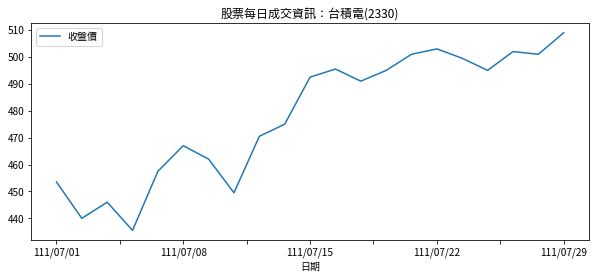

In [ ]:
# 繪製直線圖 [figsize為圖表大小]
df[['日期', '收盤價']].plot(kind='line', x='日期', y='收盤價', title='股票每日成交資訊：台積電(2330)', figsize=(10, 4))

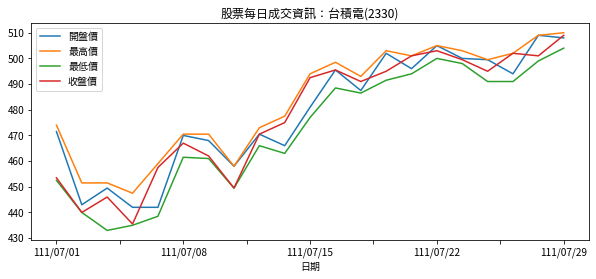

In [ ]:
# 合併多張圖表 
# plt.gca()取得現在的圖表區, ax=ax圖表畫在目前的圖表區
ax = plt.gca()
df1 = df[['日期','開盤價','最高價','最低價','收盤價']]
df1.plot(kind='line', x='日期', y='開盤價', title='股票每日成交資訊：台積電(2330)', figsize=(10, 4), ax=ax)
df1.plot(kind='line', x='日期', y='最高價', title='股票每日成交資訊：台積電(2330)', figsize=(10, 4), ax=ax)
df1.plot(kind='line', x='日期', y='最低價', title='股票每日成交資訊：台積電(2330)', figsize=(10, 4), ax=ax)
df1.plot(kind='line', x='日期', y='收盤價', title='股票每日成交資訊：台積電(2330)', figsize=(10, 4), ax=ax)

In [ ]:
# 合併報表
import pandas as pd
url = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20211026&stockNo=2330'
df1 = pd.read_html(url, header=1)[0]
url = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20210930&stockNo=2330'
df2 = pd.read_html(url, header=1)[0]
url = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20210831&stockNo=2330'
df3 = pd.read_html(url, header=1)[0]
dfall = pd.concat([df1, df2, df3], ignore_index=True).sort_values('日期')

In [ ]:
# 合併多張圖表 - 較長時間
ax = plt.gca()
dfplot = dfall[['日期','開盤價','最高價','最低價','收盤價']]
dfplot.plot(kind='line', x='日期', y='開盤價', ax=ax)
dfplot.plot(kind='line', x='日期', y='最高價', ax=ax)
dfplot.plot(kind='line', x='日期', y='最低價', ax=ax)
dfplot.plot(kind='line', x='日期', y='收盤價', title='股票每日成交資訊：台積電(2330)', figsize=(10,4), grid=True, ax=ax)

# 二、Pandas實戰-以嚴重特殊傳染性肺炎(COVID-19)資料為例

* 資料網站：https://nidss.cdc.gov.tw/ch/NIDSS_DiseaseMap.aspx?dc=1&dt=5&disease=19CoV
* CSV來源：http://od.cdc.gov.tw/eic/Weekly_Age_County_Gender_19CoV.csv

## Pandas資料讀取顯示及應用

In [ ]:
# 讀取資料
import pandas as pd
df = pd.read_csv('http://od.cdc.gov.tw/eic/Weekly_Age_County_Gender_19CoV.csv')

In [ ]:
# 檢視資料狀況


## Pandas 資料排序

## Pandas 資料篩選

In [ ]:
# 顯示台北市資料


In [ ]:
# 顯示新北市 男生 本土的病例數


In [ ]:
# 顯示 台北市、台中市及高雄市資枓


## Pandas 群組統計(group by)

In [ ]:
# 顯示各縣市資料

In [ ]:
# 顯示各縣市的確定病例數的統計
# 總數

#有幾天出現確診人數

#最大值

#最小值

#綜合

## Pandas 繪圖

In [ ]:
# 各縣市確定病例數長條圖


In [ ]:
# 各縣市確定病例數圓形圖


In [ ]:
# 各縣市年齡層圓形圖


In [ ]:
# 發病週別人數折線圖
